In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
uploaded = files.upload()

Saving 43RDM_test data.csv to 43RDM_test data (1).csv


In [0]:
import pandas as pd
import numpy as np
import missingno as msn
df_fea = pd.read_csv('43REL_train_feature data.csv')
df_lab = pd.read_csv('43REL_train_labels.csv')

In [101]:
print(df_fea.head())
print(df_lab.head())
df_fea.rename(columns={"lon": "lng"}, inplace = True)
# df_fea.dropna(inplace = True)
# df_lab.dropna(inplace=True)

         lon        lat  ...  b8_2019-04-30  ndvi_2019-04-30
0  76.042755  27.906586  ...         -999.0           -999.0
1  76.043080  27.911612  ...         -999.0           -999.0
2  76.039370  27.916418  ...         -999.0           -999.0
3  76.039734  27.916988  ...         -999.0           -999.0
4  76.036150  27.920853  ...         -999.0           -999.0

[5 rows x 326 columns]
   in  index season  year  ... crop+AF8-nm        lat        lng   Name
0   1   1863   Rabi  2018  ...       Chana  27.906586  76.042755  43REL
1   2   1864   Rabi  2018  ...       Chana  27.911612  76.043080  43REL
2   3   1865   Rabi  2018  ...       Chana  27.916418  76.039370  43REL
3   4   1866   Rabi  2018  ...       Chana  27.916988  76.039734  43REL
4   5   1867   Rabi  2018  ...       Chana  27.920853  76.036150  43REL

[5 rows x 17 columns]


In [102]:
#checking for any null values
df_fea1 = df_lab[df_lab.isna().any(axis=1)]
print(df_fea1)

Empty DataFrame
Columns: [in, index, season, year, state, distrct, lvl+AF8-4+AF8-n, level+AF8-4, cc+AF8-plt+AF8-, cc+AF8-r+AF8-nt, dt+AF8-f+AF8-sw, dt+AF8-f+AF8-ct, dt+AF8-f+AF8-hr, crop+AF8-nm, lat, lng, Name]
Index: []


In [0]:
df_merge_col = pd.merge(df_fea, df_lab, on=['lng','lat'], how = 'outer')

In [104]:
# df_merge_col.head()
print(df_merge_col.shape)
print(df_fea.shape)
# print(df_lab1.shape)
print(df_lab.shape)

(2036, 341)
(1347, 326)
(1347, 17)


In [105]:
#Removing -999 values 
df_merge_col.replace({-999.0: np.nan}, inplace = True)
df_merge_col.dropna(inplace = True)
#After dropping all the NaN values
df_merge_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 161 to 1397
Columns: 341 entries, lng to Name
dtypes: float64(330), object(11)
memory usage: 817.6+ KB


In [106]:
df_merge_col.head()

,lng,lat,b4_2018-08-01,b8_2018-08-01,ndvi_2018-08-01,b4_2018-08-03,b8_2018-08-03,ndvi_2018-08-03,b4_2018-08-06,b8_2018-08-06,ndvi_2018-08-06,b4_2018-08-08,b8_2018-08-08,ndvi_2018-08-08,b4_2018-08-11,b8_2018-08-11,ndvi_2018-08-11,b4_2018-08-13,b8_2018-08-13,ndvi_2018-08-13,b4_2018-08-16,b8_2018-08-16,ndvi_2018-08-16,b4_2018-08-18,b8_2018-08-18,ndvi_2018-08-18,b4_2018-08-21,b8_2018-08-21,ndvi_2018-08-21,b4_2018-08-23,b8_2018-08-23,ndvi_2018-08-23,b4_2018-08-26,b8_2018-08-26,ndvi_2018-08-26,b4_2018-08-28,b8_2018-08-28,ndvi_2018-08-28,b4_2018-08-31,b8_2018-08-31,...,ndvi_2019-04-10,b4_2019-04-13,b8_2019-04-13,ndvi_2019-04-13,b4_2019-04-15,b8_2019-04-15,ndvi_2019-04-15,b4_2019-04-18,b8_2019-04-18,ndvi_2019-04-18,b4_2019-04-20,b8_2019-04-20,ndvi_2019-04-20,b4_2019-04-23,b8_2019-04-23,ndvi_2019-04-23,b4_2019-04-25,b8_2019-04-25,ndvi_2019-04-25,b4_2019-04-28,b8_2019-04-28,ndvi_2019-04-28,b4_2019-04-30,b8_2019-04-30,ndvi_2019-04-30,in,index,season,year,state,distrct,lvl+AF8-4+AF8-n,level+AF8-4,cc+AF8-plt+AF8-,cc+AF8-r+AF8-nt,dt+AF8-f+AF8-sw,dt+AF8-f+AF8-ct,dt+AF8-f+AF8-hr,crop+AF8-nm,Name
161,75.51125,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.12788,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,160.0,2652.0,Rabi,2018.0,Rajasthan,Sikar,Khandela,Tehsil,0.3,Hectare,2018+AC0-11+AC0-18,2019+AC0-04+AC0-03,2019+AC0-04+AC0-30,Wheat,43REL
162,75.51125,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.12788,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,162.0,2654.0,Rabi,2018.0,Rajasthan,Sikar,Khandela,Tehsil,0.4,Hectare,2018+AC0-11+AC0-22,2019+AC0-04+AC0-03,2019+AC0-04+AC0-30,Wheat,43REL
163,75.51125,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.12788,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,160.0,2652.0,Rabi,2018.0,Rajasthan,Sikar,Khandela,Tehsil,0.3,Hectare,2018+AC0-11+AC0-18,2019+AC0-04+AC0-03,2019+AC0-04+AC0-30,Wheat,43REL
164,75.51125,27.412203,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.113228,1858.0,2279.0,0.101765,2682.0,3021.0,0.059442,4968.0,5380.0,0.039814,2113.0,2724.0,0.126318,1855.0,2399.0,0.12788,2128.0,2662.0,0.111482,1923.0,2424.0,0.115252,2166.0,2752.0,0.119154,162.0,2654.0,Rabi,2018.0,Rajasthan,Sikar,Khandela,Tehsil,0.4,Hectare,2018+AC0-11+AC0-22,2019+AC0-04+AC0-03,2019+AC0-04+AC0-30,Wheat,43REL
167,75.51125,27.412233,1051.0,3761.0,0.563175,1865.0,3791.0,0.340523,6497.0,7150.0,0.047849,6007.0,6407.0,0.032222,5093.0,5796.0,0.064561,8105.0,8150.0,0.002768,4641.0,5523.0,0.086777,875.0,1806.0,0.347258,1632.0,2573.0,0.223781,6564.0,6744.0,0.013526,2793.0,3665.0,0.135026,3620.0,4239.0,0.078763,2246.0,3355.0,...,0.1

In [0]:
df_merge_col.to_csv('new_file_outer_new1.csv', index = None)

In [0]:
filter_col = [col for col in df_merge_col if col.startswith('ndvi_2018-08')]
filter_col2 = [col for col in df_merge_col if col.startswith('ndvi_2019-04')]

In [108]:
filter_col2

['ndvi_2019-04-03',
 'ndvi_2019-04-05',
 'ndvi_2019-04-08',
 'ndvi_2019-04-10',
 'ndvi_2019-04-13',
 'ndvi_2019-04-15',
 'ndvi_2019-04-18',
 'ndvi_2019-04-20',
 'ndvi_2019-04-23',
 'ndvi_2019-04-25',
 'ndvi_2019-04-28',
 'ndvi_2019-04-30']

In [109]:
filter_col

['ndvi_2018-08-01',
 'ndvi_2018-08-03',
 'ndvi_2018-08-06',
 'ndvi_2018-08-08',
 'ndvi_2018-08-11',
 'ndvi_2018-08-13',
 'ndvi_2018-08-16',
 'ndvi_2018-08-18',
 'ndvi_2018-08-21',
 'ndvi_2018-08-23',
 'ndvi_2018-08-26',
 'ndvi_2018-08-28',
 'ndvi_2018-08-31']

In [0]:
# df_merge_col.columns[4:339]

In [0]:
# df_new = pd.read_csv('new_file_outer_new1.csv')

In [0]:
# df_merge_col.groupby(['crop+AF8-nm','dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['ndvi_2018-08-01','ndvi_2018-08-03','ndvi_2018-08-06','ndvi_2018-08-08','ndvi_2018-08-11','ndvi_2018-08-13','ndvi_2018-08-16','ndvi_2018-08-18','ndvi_2018-08-21','ndvi_2018-08-23','ndvi_2018-08-26','ndvi_2018-08-28',].count()

In [0]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(15,7)) 
# df_merge_col.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])(filter_col).count().unstack().plot(ax=ax)

In [111]:
df_merge_col.groupby(['crop+AF8-nm','dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['b8_2018-08-01','b4_2018-08-01'].mean()

b8_2018-08-01  b4_2018-08-01
crop+AF8-nm dt+AF8-f+AF8-sw    dt+AF8-f+AF8-hr                                 
Barley      2018+AC0-10+AC0-15 2019+AC0-04+AC0-21         3761.0         1051.0
            2018+AC0-10+AC0-23 2019+AC0-04+AC0-09         3057.0         1528.0
            2018+AC0-11+AC0-02 2019+AC0-04+AC0-10         3500.0         1197.0
            2018+AC0-11+AC0-05 2019+AC0-04+AC0-01         3718.0         1091.5
                               2019+AC0-04+AC0-10         3179.0         1432.0
...                                                          ...            ...
Wheat       2018+AC0-11+AC0-30 2019+AC0-04+AC0-16         3686.5         1217.0
            2018+AC0-12+AC0-06 2019+AC0-04+AC0-10         3183.0         1170.0
            2018+AC0-12+AC0-12 2019+AC0-04+AC0-10         3071.0         1515.0
            2018+AC0-12+AC0-20 2019+AC0-04+AC0-13         3513.0         1138.0
            2019+AC0-04+AC0-09 2019+AC0-04+AC0-10         3148.0         1691.0

[247 rows x 2 columns]

In [114]:
#get unique columns
df_merge_col.name.unique()

array(['Wheat', 'Barley', 'Chana', 'Mustard', 'Methi'], dtype=object)

In [0]:
df_merge_col.rename(columns={'crop+AF8-nm':'name'}, inplace=True)

In [0]:
data_barley = df_merge_col[df_merge_col.name=='Barley']
data_wheat = df_merge_col[df_merge_col.name=='Wheat']
data_chana = df_merge_col[df_merge_col.name=='Chana']
data_mustard = df_merge_col[df_merge_col.name=='Mustard']
data_methi = df_merge_col[df_merge_col.name=='Methi']

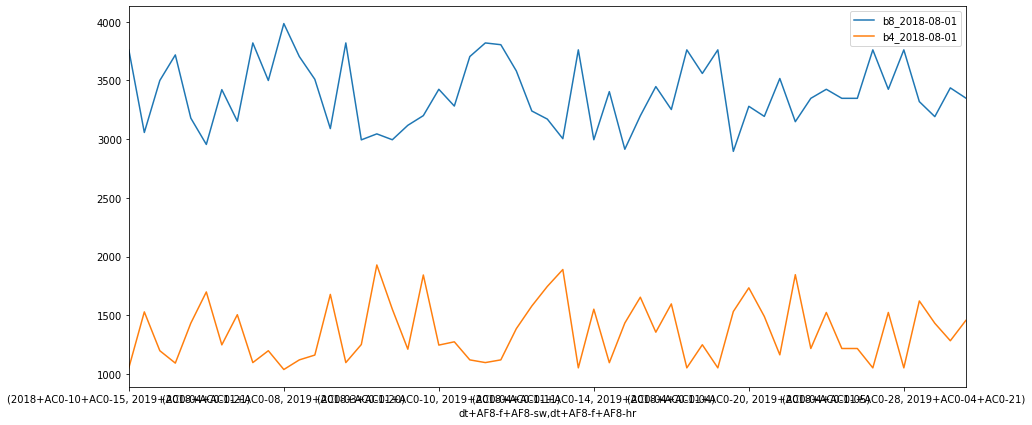

In [92]:
fig,ax=plt.subplots(figsize=(15,7))
data_barley.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['b8_2018-08-01','b4_2018-08-01'].mean().plot(ax=ax)

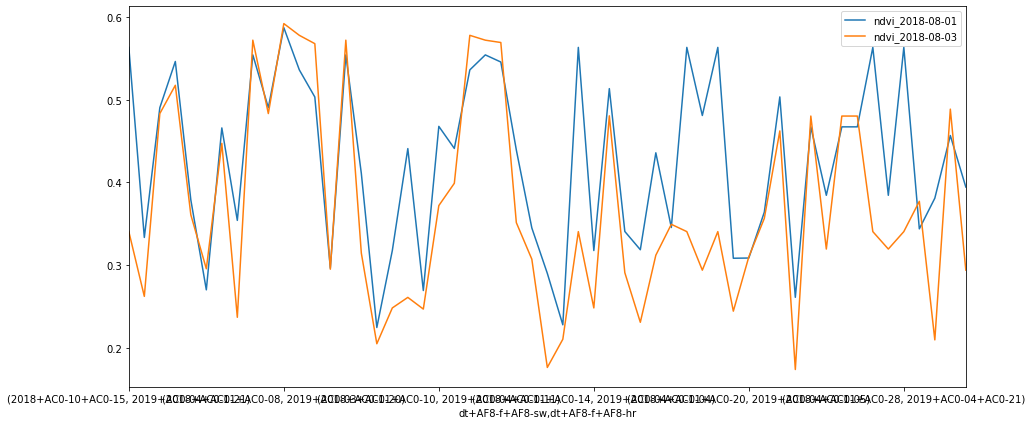

In [120]:
fig,ax=plt.subplots(figsize=(15,7))
data_barley.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['ndvi_2018-08-01','ndvi_2018-08-03'].mean().plot(ax=ax)

In [81]:
df_merge_col.groupby(['crop+AF8-nm','dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['ndvi_2018-08-01','ndvi_2018-08-01'].count()

ndvi_2018-08-01  ndvi_2018-08-01
crop+AF8-nm dt+AF8-f+AF8-sw    dt+AF8-f+AF8-hr                                     
Barley      2018+AC0-10+AC0-15 2019+AC0-04+AC0-21                1                1
            2018+AC0-10+AC0-23 2019+AC0-04+AC0-09                1                1
            2018+AC0-11+AC0-02 2019+AC0-04+AC0-10                1                1
            2018+AC0-11+AC0-05 2019+AC0-04+AC0-01                2                2
                               2019+AC0-04+AC0-10                1                1
...                                                            ...              ...
Wheat       2018+AC0-11+AC0-30 2019+AC0-04+AC0-16                2                2
            2018+AC0-12+AC0-06 2019+AC0-04+AC0-10                1                1
            2018+AC0-12+AC0-12 2019+AC0-04+AC0-10                1                1
            2018+AC0-12+AC0-20 2019+AC0-04+AC0-13                1                1
            2019+AC0-04+AC0-09 2019+AC0-04+AC0-10                1                1

[247 rows x 2 columns]

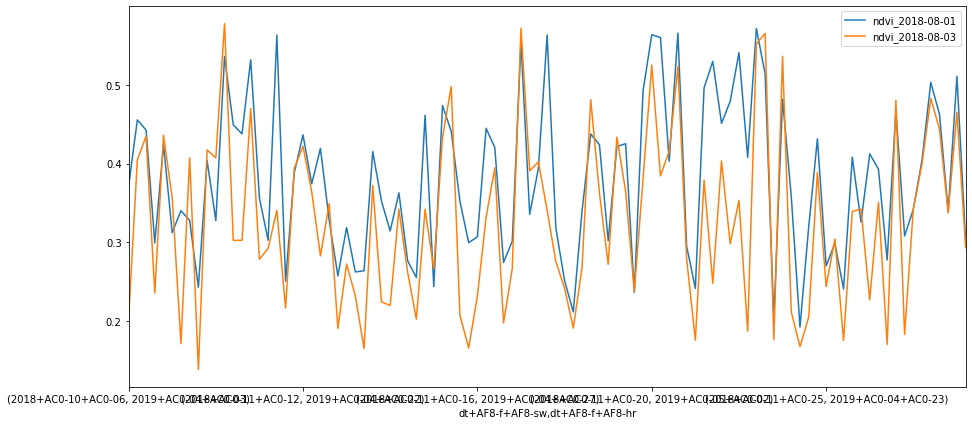

In [116]:
fig,ax=plt.subplots(figsize=(15,7))
# data_wheat.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['b8_2018-08-01','b4_2018-08-01'].mean().plot(ax=ax)
data_wheat.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['ndvi_2018-08-01','ndvi_2018-08-03'].mean().plot(ax=ax)

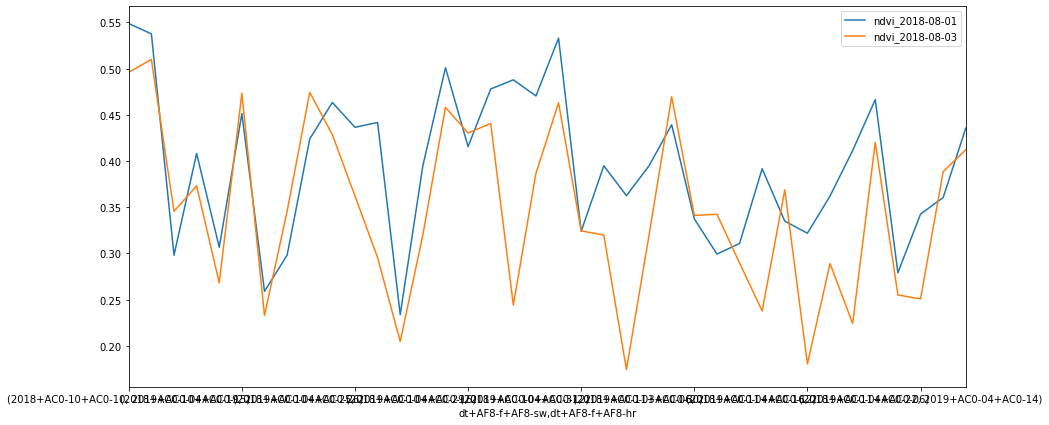

In [117]:
fig,ax=plt.subplots(figsize=(15,7))
# data_wheat.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['b8_2018-08-01','b4_2018-08-01'].mean().plot(ax=ax)
data_chana.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['ndvi_2018-08-01','ndvi_2018-08-03'].mean().plot(ax=ax)

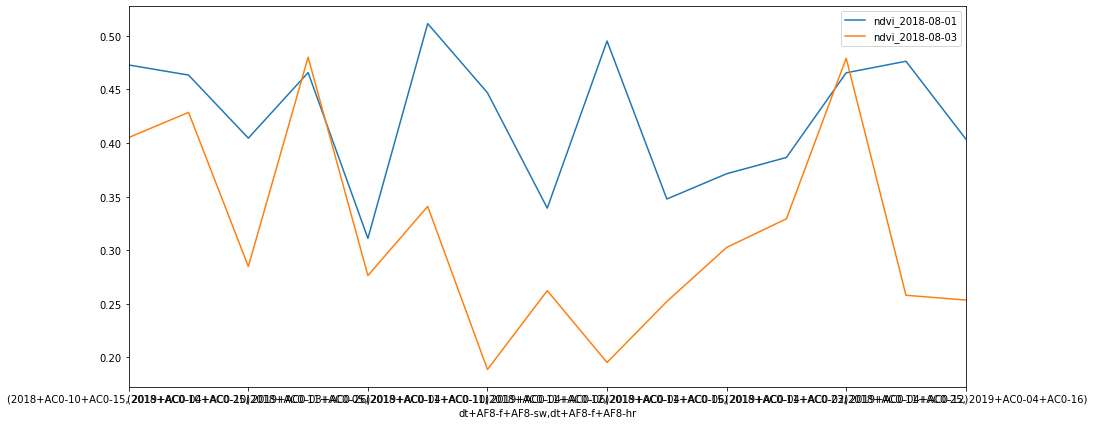

In [118]:
fig,ax=plt.subplots(figsize=(15,7))
# data_wheat.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['b8_2018-08-01','b4_2018-08-01'].mean().plot(ax=ax)
data_methi.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['ndvi_2018-08-01','ndvi_2018-08-03'].mean().plot(ax=ax)

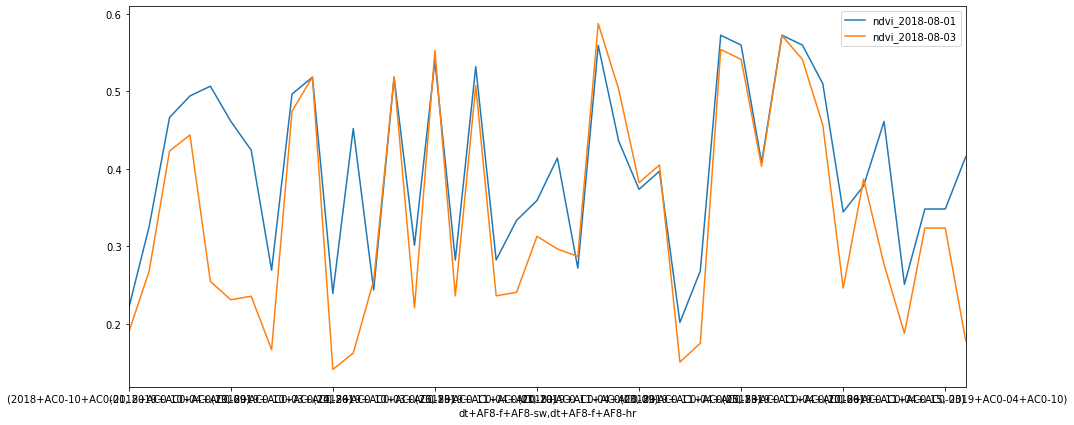

In [119]:
fig,ax=plt.subplots(figsize=(15,7))
# data_wheat.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['b8_2018-08-01','b4_2018-08-01'].mean().plot(ax=ax)
data_mustard.groupby(['dt+AF8-f+AF8-sw','dt+AF8-f+AF8-hr'])['ndvi_2018-08-01','ndvi_2018-08-03'].mean().plot(ax=ax)

In [0]:
df_test = pd.read_csv('43RDM_testdata.csv')